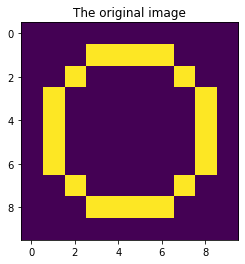

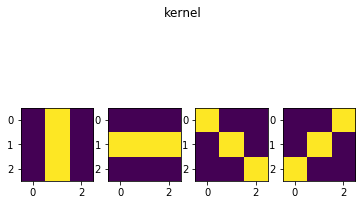

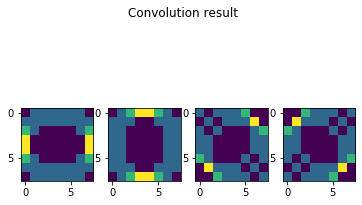

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline 

# 아주 간단한 합성곱 층을 정의합니다
class Conv:
    # 간단한 예이기 때문에, W는 3×3으로 고정하고 이후 절에서 다룰 strides나 padding을 고려하지 않았습니다
    def __init__(self, W):
        self.W = W
    def f_prop(self, X):
        out = np.zeros((X.shape[0]-2, X.shape[1]-2))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                x = X[i:i+3, j:j+3]
                # 각 요소별 곱의 합계를 취하고 있습니다
                out[i,j] = np.dot(self.W.flatten(), x.flatten())
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

plt.imshow(X)
plt.title("The original image", fontsize=12)
plt.show()

# 커널을 적절하게 설정하세요
W1 = np.array([[0,1,0],
               [0,1,0],
               [0,1,0]])
W2 = np.array([[0,0,0],
               [1,1,1],
               [0,0,0]])
W3 = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])
W4 = np.array([[0,0,1],
               [0,1,0],
               [1,0,0]])

plt.subplot(1,4,1); plt.imshow(W1)
plt.subplot(1,4,2); plt.imshow(W2)
plt.subplot(1,4,3); plt.imshow(W3)
plt.subplot(1,4,4); plt.imshow(W4)
plt.suptitle("kernel", fontsize=12)
plt.show()

# 합성곱
conv1 = Conv(W1); C1 = conv1.f_prop(X)
conv2 = Conv(W2); C2 = conv2.f_prop(X)
conv3 = Conv(W3); C3 = conv3.f_prop(X)
conv4 = Conv(W4); C4 = conv4.f_prop(X)

plt.subplot(1,4,1); plt.imshow(C1)
plt.subplot(1,4,2); plt.imshow(C2)
plt.subplot(1,4,3); plt.imshow(C3)
plt.subplot(1,4,4); plt.imshow(C4)
plt.suptitle("Convolution result", fontsize=12)
plt.show()

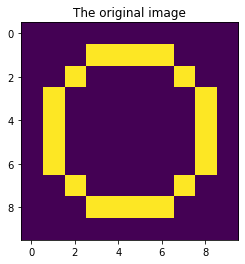

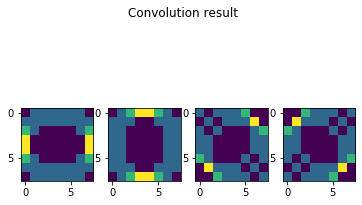

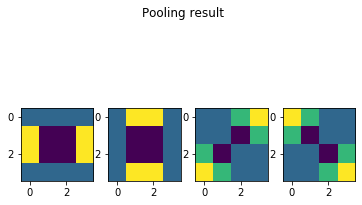

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

# 아주 간단한 합성곱 층을 정의합니다
class Conv:
    # 간단한 예이기 때문에, W는 3×3으로 고정하고 이후 절에서 다룰 strides나 padding을 고려하지 않았습니다
    def __init__(self, W):
        self.W = W
    def f_prop(self, X):
        out = np.zeros((X.shape[0]-2, X.shape[1]-2))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                x = X[i:i+3, j:j+3]
                out[i,j] = np.dot(self.W.flatten(), x.flatten())
        return out

# 아주 간단한 풀링 층을 정의합니다
class Pool:
    # 간단한 예이기 때문에, 이후 절에서 다룰 strides나 padding을 고려하지 않았습니다
    def __init__(self, l):
        self.l = l
    def f_prop(self, X):
        l = self.l
        out = np.zeros((X.shape[0]//self.l, X.shape[1]//self.l))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                # 아래 밑줄 부분을 기입하고 주석을 제거하세요
                out[i,j] = np.max(X[i*l:(i+1)*l, j*l:(j+1)*l])
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

plt.imshow(X)
plt.title("The original image", fontsize=12)
plt.show()

# 커널
W1 = np.array([[0,1,0],
               [0,1,0],
               [0,1,0]])
W2 = np.array([[0,0,0],
               [1,1,1],
               [0,0,0]])
W3 = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])
W4 = np.array([[0,0,1],
               [0,1,0],
               [1,0,0]])

# 합성곱
conv1 = Conv(W1); C1 = conv1.f_prop(X)
conv2 = Conv(W2); C2 = conv2.f_prop(X)
conv3 = Conv(W3); C3 = conv3.f_prop(X)
conv4 = Conv(W4); C4 = conv4.f_prop(X)

plt.subplot(1,4,1); plt.imshow(C1)
plt.subplot(1,4,2); plt.imshow(C2)
plt.subplot(1,4,3); plt.imshow(C3)
plt.subplot(1,4,4); plt.imshow(C4)
plt.suptitle("Convolution result", fontsize=12)
plt.show()

# 풀링
pool = Pool(2)
P1 = pool.f_prop(C1)
P2 = pool.f_prop(C2)
P3 = pool.f_prop(C3)
P4 = pool.f_prop(C4)

plt.subplot(1,4,1); plt.imshow(P1)
plt.subplot(1,4,2); plt.imshow(P2)
plt.subplot(1,4,3); plt.imshow(P3)
plt.subplot(1,4,4); plt.imshow(P4)
plt.suptitle("Pooling result", fontsize=12)
plt.show()

In [4]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

# 모델을 정의합니다
model = Sequential()

# --------------------------------------------------------------
# 여기에 코드를 작성하세요
model.add(Conv2D(input_shape=(28, 28, 1), 
                 filters=32,
                 kernel_size=(2, 2), 
                 strides=(1, 1), 
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(1,1)))
model.add(Conv2D(filters=32, 
                 kernel_size=(2, 2), 
                 strides=(1, 1), 
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(1,1)))
# --------------------------------------------------------------


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Using TensorFlow backend.
E:\Anaconda3\envs\aidemy\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda3\envs\aidemy\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda3\envs\aidemy\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda3\envs\aidemy\lib\site-packages\tensorflow\python\framework\dtypes.py

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               5538048   
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
__________

Train on 300 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 0s 550us/step
Test loss: 13.861245803833008
Test accuracy: 0.13


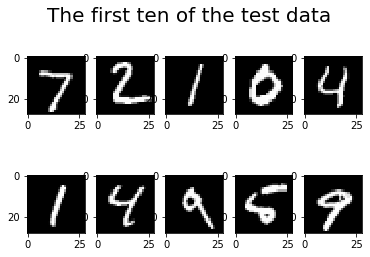

[9 0 9 9 9 9 9 9 9 9]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)             

In [5]:
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터를 로드합니다
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 전체 데이터 중 학습에는 300장, 테스트에는 100장의 데이터를 사용합니다
# Conv 층는 4차원 배열을 받아들입니다(배치 크기×가로×세로×채널 수)
# MNIST 데이터는 RGB 이미지가 아니라 원래 3차원 데이터이므로 미리 4차원으로 변환합니다
X_train = X_train[:300].reshape(-1, 28, 28, 1)
X_test = X_test[:100].reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:100]

# 모델을 정의합니다
model = Sequential()

# --------------------------------------------------------------
# 여기에 코드를 작성하세요
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
# --------------------------------------------------------------

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))

# 정확도를 평가합니다
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# 데이터를 시각화합니다(테스트 데이터의 선두 10장)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape((28,28)), 'gray')
plt.suptitle("The first ten of the test data",fontsize=20)
plt.show()

# 예측합니다(테스트 데이터의 선두 10장)
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

model.summary()

170500096/170498071 [==============================] - 1461s 9us/step
Epoch 1/1
100/100 [==============================] - 0s 2ms/step
Test loss: 13.69067699432373
Test accuracy: 0.11


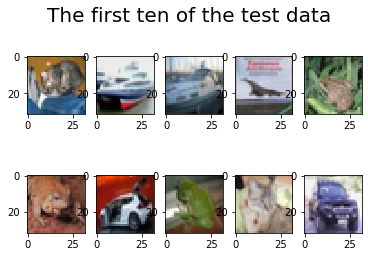

[3 3 3 3 3 3 3 6 3 3]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

In [6]:
import keras
from keras.datasets import cifar10
from keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터를 로드합니다
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 전체 데이터 중 학습에는 300장, 테스트에는 100장의 데이터를 사용합니다
X_train = X_train[:300]
X_test = X_test[:100]
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:100]


# 모델을 정의합니다
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# --------------------------------------------------------------
# 여기에 코드를 작성하세요
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# --------------------------------------------------------------

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# 컴파일합니다
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# 학습시킵니다
model.fit(X_train, y_train, batch_size=32, epochs=1)

# 가중치를 저장하려면 다음을 사용합니다
model.save_weights('param_cifar10.hdf5')

# 정확도를 평가합니다
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# 데이터를 시각화합니다(테스트 데이터의 선두 10장)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
plt.suptitle("The first ten of the test data",fontsize=20)
plt.show()

# 예측합니다(테스트 데이터의 선두 10장)
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

model.summary()

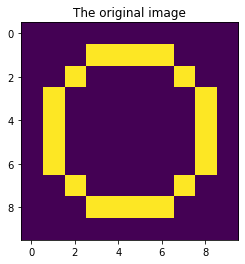

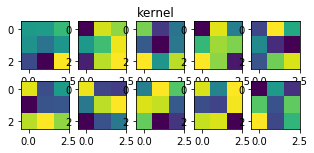

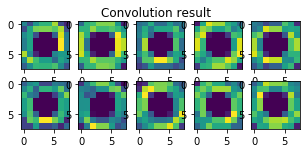

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 간단한 합성곱 층을 정의합니다
# 1채널 이미지의 합성곱만 상정합니다
# 간단한 예이기 때문에, 커널은 3×3으로 고정하고, strides나 padding은 고려하지 않습니다
class Conv:
    def __init__(self, filters):
        self.filters = filters
        self.W = np.random.rand(filters,3,3)
    def f_prop(self, X):
        out = np.zeros((filters, X.shape[0]-2, X.shape[1]-2))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+3, j:j+3]
                    out[k,i,j] = np.dot(self.W[k].flatten(), 
                                        x.flatten())
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

filters=10

# 합성곱 층을 생성합니다
conv = Conv(filters=filters)

# 합성곱을 실행하세요
C = conv.f_prop(X)
# --------------------------------------------------------------
# 이후는 모두 시각화를 위한 코드입니다
# --------------------------------------------------------------
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()

plt.figure(figsize=(5,2))
for i in range(filters):
    plt.subplot(2,filters/2,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(conv.W[i])
plt.suptitle('kernel', fontsize=12)
plt.show()

plt.figure(figsize=(5,2))
for i in range(filters):
    plt.subplot(2,filters/2,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(C[i])
plt.suptitle('Convolution result', fontsize=12)
plt.show()

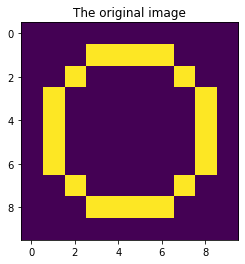

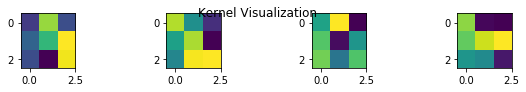

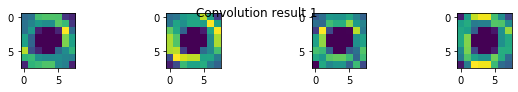

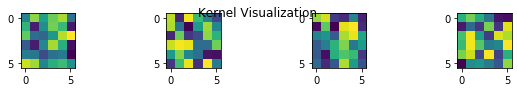

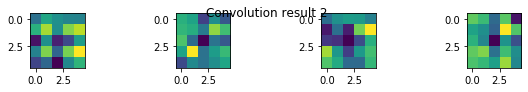

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 간단한 합성곱 층을 정의합니다
# 1채널 이미지의 합성곱만 상정합니다
# 간단한 예이기 때문에, strides나 padding은 고려하지 않습니다
class Conv:
    def __init__(self, filters, kernel_size):
        self.filters = filters
        self.kernel_size = kernel_size
        self.W = np.random.rand(filters, kernel_size[0], kernel_size[1])
    def f_prop(self, X):
        k_h, k_w = self.kernel_size
        out = np.zeros((filters, X.shape[0]-k_h+1, X.shape[1]-k_w+1))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+k_h, j:j+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), x.flatten())
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

# 합성곱 1
filters = 4
kernel_size = (3,3)

# 합성곱 층을 생성합니다
conv1 = Conv(filters=filters, kernel_size=kernel_size)

# 합성곱을 실행합니다
C1 = conv1.f_prop(X)

# 합성곱 2
filters = 4
kernel_size = (6,6)

# 합성곱 층을 생성하세요
conv2 = Conv(filters=filters, kernel_size=kernel_size)

# 합성곱을 실행하세요
C2 = conv2.f_prop(X)
# --------------------------------------------------------------
# 이후는 모두 시각화를 위한 코드입니다
# --------------------------------------------------------------
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(conv1.W[i])
plt.suptitle('Kernel Visualization', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(C1[i])
plt.suptitle('Convolution result 1', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(conv2.W[i])
plt.suptitle('Kernel Visualization', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(C2[i])
plt.suptitle('Convolution result 2', fontsize=12)
plt.show()

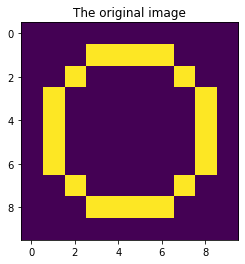

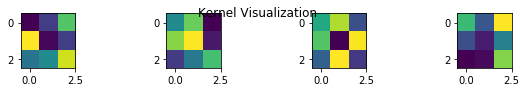

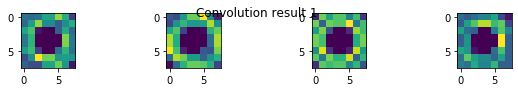

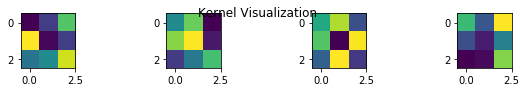

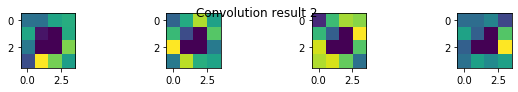

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 간단한 합성곱 층을 정의합니다
# 1채널 이미지의 합성곱만 상정합니다
# 간단한 예이기 때문에, padding을 고려하지 않습니다
class Conv:
    def __init__(self, filters, kernel_size, strides):
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.W = np.random.rand(filters, kernel_size[0], kernel_size[1])
    def f_prop(self, X):
        k_h = self.kernel_size[0]
        k_w = self.kernel_size[1]
        s_h = self.strides[0]
        s_w = self.strides[1]
        out = np.zeros((filters, (X.shape[0]-k_h)//s_h+1, 
                        (X.shape[1]-k_w)//s_w+1))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i*s_h:i*s_h+k_h, j*s_w:j*s_w+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), x.flatten())
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

# 합성곱 1
filters = 4
kernel_size = (3,3)
strides = (1,1)

# 합성곱 층을 생성합니다
conv1 = Conv(filters=filters, kernel_size=kernel_size, strides=strides)

# 합성곱을 실행합니다
C1 = conv1.f_prop(X)

# 합성곱 2
filters = 4
kernel_size = (3,3)
strides = (2,2)

# 합성곱 층을 생성하세요
conv2 = Conv(filters=filters, kernel_size=kernel_size, strides=strides)
conv2.W = conv1.W # 커널을 통일합니다

# 합성곱을 실행하세요
C2 = conv2.f_prop(X)
# --------------------------------------------------------------
# 이후는 모두 시각화를 위한 코드입니다
# --------------------------------------------------------------
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(conv1.W[i])
plt.suptitle('Kernel Visualization', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(C1[i])
plt.suptitle('Convolution result 1', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(conv2.W[i])
plt.suptitle('Kernel Visualization', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(C2[i])
plt.suptitle('Convolution result 2', fontsize=12)
plt.show()

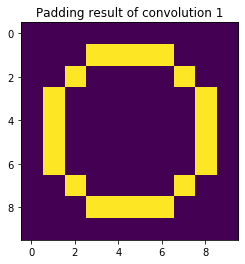

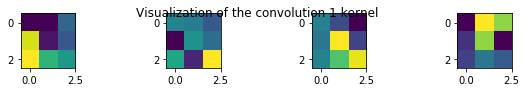

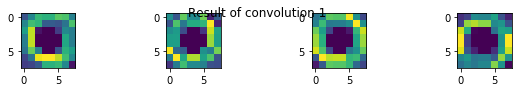

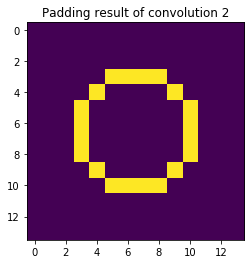

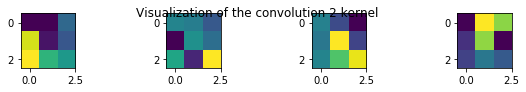

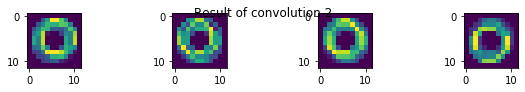

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request


# 간단한 합성곱 층을 정의합니다
# 1채널 이미지의 합성곱만 상정합니다
class Conv:
    def __init__(self, filters, kernel_size, strides, padding):
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.padding = padding
        self.W = np.random.rand(filters, kernel_size[0], kernel_size[1])
    def f_prop(self, X):
        k_h, k_w = self.kernel_size
        s_h, s_w = self.strides
        p_h, p_w = self.padding
        out = np.zeros((filters, (X.shape[0]+p_h*2-k_h)//s_h+1, 
                        (X.shape[1]+p_w*2-k_w)//s_w+1))
        # パディング
        X = np.pad(X, ((p_h, p_h), (p_w, p_w)), 'constant', 
                   constant_values=((0,0),(0,0)))
        self.X = X # 나중에 패딩 결과를 시각화하기 위해 저장해둡니다
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i*s_h:i*s_h+k_h, j*s_w:j*s_w+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), 
                                        x.flatten())
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

# 합성곱 1
filters = 4
kernel_size = (3,3)
strides = (1,1)
padding = (0,0)

# 합성곱 층을 생성합니다
conv1 = Conv(filters=filters, kernel_size=kernel_size, strides=strides, 
             padding=padding)

# 합성곱을 실행합니다
C1 = conv1.f_prop(X)

# 합성곱 2
filters = 4
kernel_size = (3,3)
strides = (1,1)
padding = (2,2)

# 합성곱 층을 생성합니다
conv2 = Conv(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding)
conv2.W = conv1.W # 가중치를 통일합니다

# 합성곱을 실행하세요
C2 = conv2.f_prop(X)
# --------------------------------------------------------------
# 이후는 모두 시각화를 위한 코드입니다
# --------------------------------------------------------------
plt.imshow(conv1.X)
plt.title('Padding result of convolution 1', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(conv1.W[i])
plt.suptitle('Visualization of the convolution 1 kernel', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(C1[i])
plt.suptitle('Result of convolution 1', fontsize=12)
plt.show()

plt.imshow(conv2.X)
plt.title('Padding result of convolution 2', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(conv2.W[i])
plt.suptitle('Visualization of the convolution 2 kernel', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(C2[i])
plt.suptitle('Result of convolution 2', fontsize=12)
plt.show()

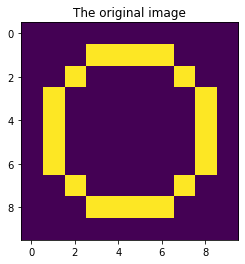

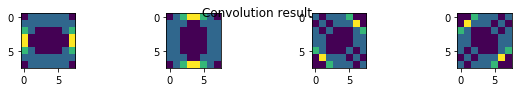

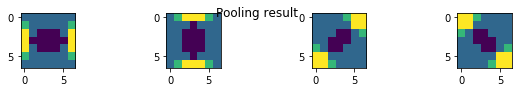

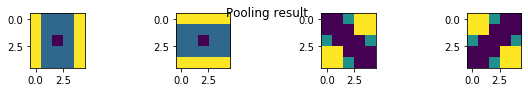

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 간단한 합성곱 층을 정의합니다
class Conv:
    def __init__(self, W, filters, kernel_size):
        self.filters = filters
        self.kernel_size = kernel_size
        self.W = W # np.random.rand(filters, kernel_size[0], 
                   # kernel_size[1])
    def f_prop(self, X):
        k_h, k_w = self.kernel_size
        out = np.zeros((filters, X.shape[0]-k_h+1, X.shape[1]-k_w+1))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+k_h, j:j+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), 
                                        x.flatten())
        return out

# 간단한 풀링 층을 정의합니다
# 1채널의 특징 맵의 풀링만 상정합니다
class Pool:
    def __init__(self, pool_size):
        self.pool_size = pool_size
    def f_prop(self, X):
        k_h, k_w = self.pool_size
        out = np.zeros((X.shape[0]-k_h+1, X.shape[1]-k_w+1))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                out[i,j] = np.max(X[i:i+k_h, j:j+k_w])
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

local_filename_w, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/weight.npy') 
W = np.load(local_filename_w)

# 합성곱
filters = 4
kernel_size = (3,3)
conv = Conv(W=W, filters=filters, kernel_size=kernel_size)
C = conv.f_prop(X)

# 풀링 1
pool_size = (2,2)
pool1 = Pool(pool_size)
P1 = [pool1.f_prop(C[i]) for i in range(len(C))]

# 풀링 2(정의하세요)
pool_size = (4,4)
pool2 = Pool(pool_size)
P2 = [pool2.f_prop(C[i]) for i in range(len(C))]
# --------------------------------------------------------------
# 이후는 모두 시각화를 위한 코드입니다
# --------------------------------------------------------------
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(C[i])
plt.suptitle('Convolution result', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(P1[i])
plt.suptitle('Pooling result', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(P2[i])
plt.suptitle('Pooling result', fontsize=12)
plt.show()

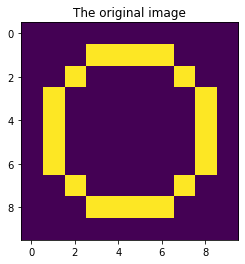

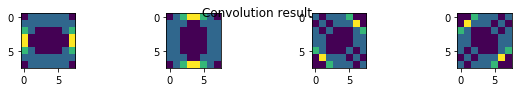

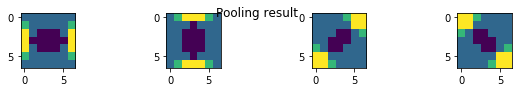

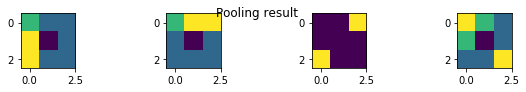

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 간단한 합성곱 층을 정의합니다
class Conv:
    def __init__(self, W, filters, kernel_size):
        self.filters = filters
        self.kernel_size = kernel_size
        self.W = W # np.random.rand(filters, kernel_size[0], 
                   #                kernel_size[1])
    def f_prop(self, X):
        k_h, k_w = self.kernel_size
        out = np.zeros((filters, X.shape[0]-k_h+1, X.shape[1]-k_w+1))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+k_h, j:j+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), 
                                        x.flatten())
        return out

# 간단한 풀링 층을 정의합니다
# 1채널의 특징 맵의 풀링만 상정합니다
class Pool:
    def __init__(self, pool_size, strides):
        self.pool_size = pool_size
        self.strides = strides
    def f_prop(self, X):
        k_h, k_w = self.pool_size
        s_h, s_w = self.strides
        out = np.zeros(((X.shape[0]-k_h)//s_h+1, (X.shape[1]-k_w)//s_w+1))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                out[i,j] = np.max(X[i*s_h:i*s_h+k_h, j*s_w:j*s_w+k_w])
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

local_filename_w, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/weight.npy') 
W = np.load(local_filename_w)

# 합성곱
filters = 4
kernel_size = (3,3)
conv = Conv(W=W, filters=filters, kernel_size=kernel_size)
C = conv.f_prop(X)

# 풀링 1
pool_size = (2,2)
strides = (1,1)
pool1 = Pool(pool_size, strides)
P1 = [pool1.f_prop(C[i]) for i in range(len(C))]

# 풀링 2(정의하세요)
pool_size = (3,3)
strides = (2,2)
pool2 = Pool((3,3), (2,2))
P2 = [pool2.f_prop(C[i]) for i in range(len(C))]
# --------------------------------------------------------------
# 이후는 모두 시각화를 위한 코드입니다
# --------------------------------------------------------------
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(C[i])
plt.suptitle('Convolution result', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(P1[i])
plt.suptitle('Pooling result', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(P2[i])
plt.suptitle('Pooling result', fontsize=12)
plt.show()

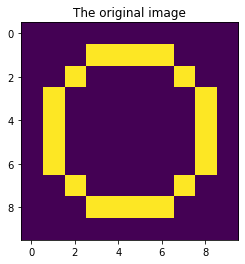

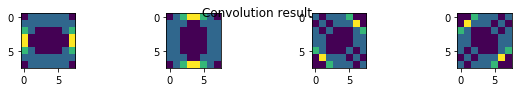

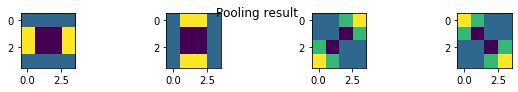

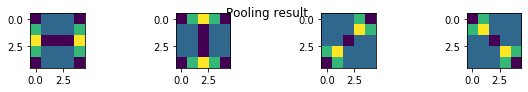

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 간단한 합성곱 층을 정의합니다
class Conv:
    def __init__(self, W, filters, kernel_size):
        self.filters = filters
        self.kernel_size = kernel_size
        self.W = W # np.random.rand(filters, kernel_size[0], 
                   #                         kernel_size[1])
    def f_prop(self, X):
        k_h, k_w = self.kernel_size
        out = np.zeros((filters, X.shape[0]-k_h+1, X.shape[1]-k_w+1))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+k_h, j:j+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), 
                                        x.flatten())
        return out

# 간단한 풀링 층을 정의합니다
# 1채널의 특징 맵의 풀링만 상정합니다
class Pool:
    def __init__(self, pool_size, strides, padding):
        self.pool_size = pool_size
        self.strides = strides
        self.padding = padding
    def f_prop(self, X):
        k_h, k_w = self.pool_size
        s_h, s_w = self.strides
        p_h, p_w = self.padding
        out = np.zeros(((X.shape[0]+p_h*2-k_h)//s_h+1, 
                        (X.shape[1]+p_w*2-k_w)//s_w+1))
        X = np.pad(X, ((p_h,p_h),(p_w,p_w)), 'constant', 
                   constant_values=((0,0),(0,0)))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                out[i,j] = np.max(X[i*s_h:i*s_h+k_h, j*s_w:j*s_w+k_w])
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

local_filename_w, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/weight.npy') 
W = np.load(local_filename_w)

# 합성곱
filters = 4
kernel_size = (3,3)
conv = Conv(W=W, filters=filters, kernel_size=kernel_size)
C = conv.f_prop(X)

# 풀링 1
pool_size = (2,2)
strides = (2,2)
padding = (0,0)
pool1 = Pool(pool_size=pool_size, strides=strides, padding=padding)
P1 = [pool1.f_prop(C[i]) for i in range(len(C))]

# 풀링 2(정의하세요)
pool_size = (2,2)
strides = (2,2)
padding = (1,1)
pool2 = Pool(pool_size=pool_size, strides=strides, padding=padding)
P2 = [pool2.f_prop(C[i]) for i in range(len(C))]
# --------------------------------------------------------------
# 이후는 모두 시각화를 위한 코드입니다
# --------------------------------------------------------------
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(C[i])
plt.suptitle('Convolution result', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(P1[i])
plt.suptitle('Pooling result', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(P2[i])
plt.suptitle('Pooling result', fontsize=12)
plt.show()

In [16]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

# 모델을 정의합니다
# 인스턴스를 작성하세요
model = Sequential()

model.add(Conv2D(input_shape=(28, 28, 1), 
                 filters=32,
                 kernel_size=(2, 2), 
                 strides=(1, 1), 
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(1,1)))
model.add(Conv2D(filters=32, 
                 kernel_size=(2, 2), 
                 strides=(1, 1), 
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(1,1)))
model.add(Flatten())
model.add(Dense(256))


# 활성화 함수는 sigmoid을 사용하세요
model.add(Activation('sigmoid'))
model.add(Dense(128))

# 활성화 함수는 sigmoid을 사용하세요
model.add(Activation('sigmoid'))
model.add(Dense(10))

# 활성화 함수는 softmax를 사용하세요
model.add(Activation('softmax'))

model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 27, 27, 32)        4128      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               5538048   
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
__________